# **<p style = "text-align: center">LẬP TRÌNH KHOA HỌC DỮ LIỆU</p>**
## **<p style = "text-align: center">Đồ án Cuối kì</p>**
## **<p style = "text-align: center">KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU</p>**
### <p style = "text-align: center"> <b>Đề tài:</b> KHÁM PHÁ, THỐNG KÊ CỦA TOP CÁC CA KHÚC TRÊN SPOTIFY</p>
<p style = "text-align: center"> Sinh viên thực hiện </p>

| Mã số sinh viên | Họ và tên |
| --- | --- |
| 20120040 | Nguyễn Quang Gia Bảo |
| 20120127 | Trần Minh Tuấn Kiệt |
| 20120136 | Huỳnh Tuấn Nam |
| 20120158 | Trần Hoàng Anh Phi |

---

# **Import các thư viện**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# **1. Thông tin về dữ liệu**<br>
Dữ liệu được sử dụng trong bài được lấy từ trang: <a href = "https://www.kaggle.com/datasets/yelexa/spotify200?select=final.csv"> https://www.kaggle.com/datasets/yelexa/spotify200?select=final.csv</a><br>
Dataset chứa các ca khúc nằm trong TOP 200 ca khúc hay nhất trong 1 tuần của mỗi quốc gia từ 2021/02/04 ~ 2022/07/14

Theo như file "README.md":
> This directory contains codes that I used to create the dataset: https://www.kaggle.com/datasets/yelexa/spotify200<br><br>To create the dataset, I downloaded the csv files from the 'Weekly Top Songs' charts on Spotify Charts for each country from the week of 2021/02/04 ~ 2022/07/14. For the 'Global' charts, there is data from the week of 2016/12/29 ~ 2022/07/14. I used concat.py to create one combined file for each country, then used data.py to collect additional data for each song from the Spotify API.<br><br>The dataset was aggregated into an interactive dashboard, where you can explore artists and music trends around the world: https://public.tableau.com/app/profile/yejielee/viz/TheModernARExperienceWhichGlobalArtistWillYouSign/ar_dashboard?publish=yes

## **2. Khám phá dữ liệu**

Đọc dữ liệu từ file csv

In [2]:
spotify_df = pd.read_csv("csv/final.csv", index_col= 0)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2352\2503757291.py:1: DtypeWarning: Columns (2,4,9,12,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,35) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify_df = pd.read_csv("csv/final.csv", index_col= 0)


## Một số thông tin cơ bản của Data Frame

Xem vài dòng dữ liệu

In [3]:
spotify_df.head()

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a9...,0,Plan A,...,0.0495,0.0,0.0658,0.557,173.935,178203.0,Argentina,South America,Spanish,0
1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1.0,WOS,spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK,argentine indie,https://i.scdn.co/image/ab6761610000e5eb75e151...,0,ARRANCARMELO,...,0.724,0.0,0.134,0.262,81.956,183547.0,Argentina,South America,Spanish,0
2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,3,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a9...,0,Chance,...,0.241,0.0,0.0929,0.216,137.915,204003.0,Argentina,South America,Spanish,0
3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,5,Cris Mj,1.0,Cris Mj,spotify:artist:1Yj5Xey7kTwvZla8sqdsdE,urbano chileno,https://i.scdn.co/image/ab6761610000e5eb8f4ebc...,0,Una Noche en Medellín,...,0.0924,0.000046,0.0534,0.832,96.018,153750.0,Argentina,South America,Spanish,0
4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1.0,Emilia,spotify:artist:0AqlFI0tz2DsEoJlKSIiT9,pop argentino,https://i.scdn.co/image/ab6761610000e5ebaf96d1...,0,cuatro veinte,...,0.0811,0.000063,0.101,0.501,95.066,133895.0,Argentina,South America,Spanish,0


Số chiều của Data Frame

In [4]:
spotify_df.shape

(1787999, 35)

Tên của các cột

In [5]:
spotify_df.columns

Index(['uri', 'rank', 'artist_names', 'artists_num', 'artist_individual',
       'artist_id', 'artist_genre', 'artist_img', 'collab', 'track_name',
       'release_date', 'album_num_tracks', 'album_cover', 'source',
       'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams', 'week',
       'danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration', 'country', 'region', 'language', 'pivot'],
      dtype='object')

## Thông tin của một dòng

Mỗi một dòng dữ liệu là thông tin của một bài hát thịnh hành trong TOP 200 của một tuần bất kì.

## Thông tin của một cột

In [6]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
columns_describe_df = pd.read_csv("csv/columns.csv")
columns_describe_df

,Tên cột,Mô tả
0,uri,URI của bản nhạc trên spotify
1,rank,Xếp hạng của bản nhạc trong tuần
2,artist names,Tên tất cả người thực hiện ca khúc
3,artists num,Số người thực hiện bài hát
4,artist individual,Bài hát của cá nhân nghệ sĩ
5,artist id,URI của nghệ sĩ độc quyền bài hát
6,artist genre,Thể loại mà nghệ sĩ trình diễn
7,artist img,Đường dẫn hình ảnh của nghệ sĩ
8,collab,0 nếu nghệ sĩ trình diễn một mình và 1 nếu ngược lại
9,track name,tên của bản nhạc


## Kiểm tra xem các trường dữ liệu có vấn đề gì không

**Dữ liệu có bị trùng hay không?**

In [7]:
spotify_df.duplicated().sum()

72

Có 73 giá trị trùng 

In [8]:
spotify_df[spotify_df.duplicated()]

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,source,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
51224,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,source,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
75474,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,source,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
81333,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,source,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
104818,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,source,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
133873,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,source,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684645,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,source,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
1705705,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,source,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
1736824,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,source,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
1758970,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,source,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot


Như vậy có 73 giá trị trùng nhau (72 + 1 giá trị gốc), và bằng với số lượng dòng có giá trị giống tên cột. 

Ta sẽ loại bỏ các dòng này và loại bỏ luôn dòng gốc 

In [9]:
spotify_df.drop_duplicates(keep=False, inplace=True)
spotify_df.duplicated().sum()

0

Theo như tác giả, nếu một bài hát có nhiều ca sĩ thể hiện, bài hát sẽ được chia thành các hàng riêng cho từng nghệ sĩ. Tuy nhiên, ở đây ta bỏ qua thông tin của từng người thể hiện và chỉ xét đến thông tin của bài hát, do đó ta sẽ bỏ đi các cột trùng nhau này (chỉ khác nhau ở thông tin các nghệ sĩ thành viên). 

Thông tin của mỗi bài hát được phân biệt với nhau bằng <font color=red>uri, country, week</font>, vì vậy ta sẽ drop các hàng trùng nhau dựa trên cột này.

In [10]:
spotify_df[(spotify_df.country == "Vietnam") & (spotify_df.artists_num == 2)]

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,source,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
1774373,spotify:track:46HNZY1i7O6jwTA7Slo2PI,5,"Coldplay, BTS",2.0,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,pop,https://i.scdn.co/image/ab6761610000e5eb865a3301762a8fce048cb469,1,My Universe,2021-10-15,12.0,https://i.scdn.co/image/ab67616d0000b273ec10f247b100da1ce0d80b6d,Parlophone UK,1,3,14,217343,2021-12-30,0.573,0.711,1,0,-6.268,0.0406,0.0114,0.0,0.328,0.47,105.006,226198,Vietnam,Asia,Vietnamese,0
1774374,spotify:track:46HNZY1i7O6jwTA7Slo2PI,5,"Coldplay, BTS",2.0,BTS,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,k-pop boy group,https://i.scdn.co/image/ab6761610000e5eb5704a64f34fe29ff73ab56bb,1,My Universe,2021-10-15,12.0,https://i.scdn.co/image/ab67616d0000b273ec10f247b100da1ce0d80b6d,Parlophone UK,1,3,14,217343,2021-12-30,0.573,0.711,1,0,-6.268,0.0406,0.0114,0.0,0.328,0.47,105.006,226198,Vietnam,Asia,Vietnamese,1
1774375,spotify:track:5PjdY0CKGZdEuoNab3yDmX,8,"The Kid LAROI, Justin Bieber",2.0,The Kid LAROI,spotify:artist:2tIP7SsRs7vjIcLrU85W8J,australian hip hop,https://i.scdn.co/image/ab6761610000e5eb152a7ee8fc0469aaeb015f02,1,STAY (with Justin Bieber),2021-07-23,29.0,https://i.scdn.co/image/ab67616d0000b2738e6551a2944764bc8e33a960,Columbia,1,6,25,159318,2021-12-30,0.591,0.764,1,1,-5.484,0.0483,0.0383,0.0,0.103,0.478,169.928,141806,Vietnam,Asia,Vietnamese,0
1774376,spotify:track:5PjdY0CKGZdEuoNab3yDmX,8,"The Kid LAROI, Justin Bieber",2.0,Justin Bieber,spotify:artist:1uNFoZAHBGtllmzznpCI3s,canadian pop,https://i.scdn.co/image/ab6761610000e5eb8ae7f2aaa9817a704a87ea36,1,STAY (with Justin Bieber),2021-07-23,29.0,https://i.scdn.co/image/ab67616d0000b2738e6551a2944764bc8e33a960,Columbia,1,6,25,159318,2021-12-30,0.591,0.764,1,1,-5.484,0.0483,0.0383,0.0,0.103,0.478,169.928,141806,Vietnam,Asia,Vietnamese,1
1774384,spotify:track:5T6j0rfpCDBzAxC8Fpd0N7,18,"Low G, Thắng",2.0,Low G,spotify:artist:6TITnFVRcl0AcZ4syE7Toe,vietnamese hip hop,https://i.scdn.co/image/ab6761610000e5eb00ece52e50b41c7d6192cc26,1,An Thần,2021-10-21,1.0,https://i.scdn.co/image/ab67616d0000b2730a018b3db5d975e4bade5879,Rap Nhà Làm,2,17,10,113847,2021-12-30,0.758,0.773,6,0,-7.266,0.214,0.631,0.000002,0.114,0.907,169.996,174286,Vietnam,Asia,Vietnamese,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787991,spotify:track:51bYFYWODfYOZU0rwvjiCc,195,"Binz, Đen",2.0,Đen,spotify:artist:1LEtM3AleYg1xabW6CRkpi,v-pop,https://i.scdn.co/image/ab6761610000e5eb37206c8851747995ecf49f9d,1,Cho Mình Em,2021-04-01,1.0,https://i.scdn.co/image/ab67616d0000b273a1ca722c889a36ec84d48649,WM Vietnam,32,193,56,37880,2022-05-05,0.603,0.412,0,1,-10.359,0.0579,0.891,0.0212,0.115,0.371,99.886,206400,Vietnam,Asia,Vietnamese,1
1787992,spotify:track:0vLXpeE2Z7iVvcba8PAwwI,196,"Kai Đinh, SIVAN",2.0,Kai Đinh,spotify:artist:3E6LGptA8lBEXPHAQCE3vr,v-pop,https://i.scdn.co/image/ab6761610000e5eb8c1162744cc256860318fe92,1,Thế Hệ Tan Vỡ (feat. SIVAN),2021-11-17,1.0,https://i.scdn.co/image/ab67616d0000b2734493b8e39ce5d7d633882637,Yin Yang Media,120,200,13,37825,2022-05-05,0.696,0.477,6,0,-11.058,0.0421,0.671,0.000367,0.0938,0.335,140.112,288000,Vietnam,Asia,Vietnamese,0
1787993,spotify:track:0vLXpeE2Z7iVvcba8PAwwI,196,"Kai Đinh, SIVAN",2.0,SIVAN,spotify:artist:0wJWawRvX8K9joiK9QqkX5,0,https://i.scdn.co/image/ab6761610000e5eb0cd580a380f467e4f0b4137d,1,Thế Hệ Tan Vỡ (feat. SIVAN),2021-11-17,1.0,https://i.scdn.co/image/ab67616d0000b2734493b8e39ce5d7d633882637,Yin Yang Media,120,200,13,37825,2022-05-05,0.696,0.477,6,0,-11.058,0.0421,0.671,0.000367,0.0938,0.335,140.112,288000,Vietnam,Asia,Vietnamese,1
1787994,spotify:track:1XGmzt0PVuFgQYYnV2It7A,197,"Maroon 5, Wiz Khalifa",2

In [11]:
spotify_df = spotify_df.drop_duplicates(subset=['uri','country','week'] , keep='first', ignore_index=True)

**Dữ liệu bị thiếu, rỗng**

In [12]:
# spotify_df[spotify_df.isna().any(axis=1)]
# spotify_df[spotify_df.isnull().any(axis=1)]

spotify_df.isna().sum()

uri                    0
rank                   0
artist_names           0
artists_num            0
artist_individual      0
artist_id              0
artist_genre           0
artist_img           816
collab                 0
track_name             0
release_date           0
album_num_tracks       0
album_cover           15
source                 0
peak_rank              0
previous_rank          0
weeks_on_chart         0
streams                0
week                   0
danceability         145
energy               145
key                  145
mode                 145
loudness             145
speechiness          145
acousticness         145
instrumentalness     145
liveness             145
valence              145
tempo                145
duration             145
country                0
region                 0
language               0
pivot                  0
dtype: int64

Có một vài giá trị thiếu, ta sẽ xử lý các giá trị này sau

**Xem một vài thông tin của dataframe:**

In [13]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109520 entries, 0 to 1109519
Data columns (total 35 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   uri                1109520 non-null  object
 1   rank               1109520 non-null  object
 2   artist_names       1109520 non-null  object
 3   artists_num        1109520 non-null  object
 4   artist_individual  1109520 non-null  object
 5   artist_id          1109520 non-null  object
 6   artist_genre       1109520 non-null  object
 7   artist_img         1108704 non-null  object
 8   collab             1109520 non-null  object
 9   track_name         1109520 non-null  object
 10  release_date       1109520 non-null  object
 11  album_num_tracks   1109520 non-null  object
 12  album_cover        1109505 non-null  object
 13  source             1109520 non-null  object
 14  peak_rank          1109520 non-null  object
 15  previous_rank      1109520 non-null  object
 16  

**Xảy ra một số vấn đề về kiểu dữ liệu. Là do có nhiều kiểu dữ liệu bên trong cột.**

In [14]:
def open_oject_dtype(column):
    dtypes = set(column.apply(lambda x: type(x)))
    
    return dtypes

In [15]:
# spotify_df["rank"].unique()

# spotify_df["artists_num"].unique()

# spotify_df["collab"].unique()

# spotify_df["peak_rank"].unique()

# spotify_df["previous_rank"].unique()

# spotify_df["weeks_on_chart"].unique()

# spotify_df["streams"].unique()

# spotify_df[spotify_df["uri"] == "uri"]

In [16]:
columns = spotify_df.columns
# open_oject_dtype(spotify_df["uri"])
spotify_df[columns].apply(open_oject_dtype)

uri                                                  {<class 'str'>}
rank                                  {<class 'int'>, <class 'str'>}
artist_names                                         {<class 'str'>}
artists_num                         {<class 'float'>, <class 'str'>}
artist_individual                                    {<class 'str'>}
artist_id                                            {<class 'str'>}
artist_genre                                         {<class 'str'>}
artist_img                          {<class 'float'>, <class 'str'>}
collab                                {<class 'int'>, <class 'str'>}
track_name                                           {<class 'str'>}
release_date                                         {<class 'str'>}
album_num_tracks                    {<class 'float'>, <class 'str'>}
album_cover                         {<class 'float'>, <class 'str'>}
source                                               {<class 'str'>}
peak_rank                         

Cột `rank`, `artists_num`, `collab`, `peak_rank`, `previous_rank`, `weeks_on_chart`, `streams` và một số cột `cường độ`: một phần số với kiểu dữ liệu **int**, một phần số với kiểu dữ liệu là **str**<br>

**Ta thấy các cột `rank`, `artist_num`, `collab`, `peak_rank`, `previous_rank`, `weeks_on_chart`, `streams` lẽ ra phải có kiểu dữ liệu là numeric.** 
- Do đó ta sẽ tiến hành chuyển các cột này về đúng kiểu dữ liệu.<br>
- Ta sẽ viết hàm để thuận tiện cho việc chuyển.<br>
- Riêng cột `artists_num` có thêm hậu tố .0 phía sau nên sẽ xử lý riêng.

In [17]:
def to_numeric(column, data_type):
    spotify_df[column] = spotify_df[column].astype(data_type)
    #return spotify_df[column]
# print(spotify_df)

In [18]:
to_numeric('rank', int)

In [19]:
to_numeric('streams', int)

In [20]:
to_numeric('peak_rank', int)

In [21]:
to_numeric('previous_rank', int)

In [22]:
spotify_df['artists_num'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1109520 entries, 0 to 1109519
Series name: artists_num
Non-Null Count    Dtype 
--------------    ----- 
1109520 non-null  object
dtypes: object(1)
memory usage: 8.5+ MB


Cột `artists_num` có mixtypes

In [23]:
count = spotify_df['artists_num'].value_counts()
# count
count[count.index=='1.0'].sum()

515719

Text(0.5, 1.0, 'Số lượng ca sĩ thể hiện bài hát')

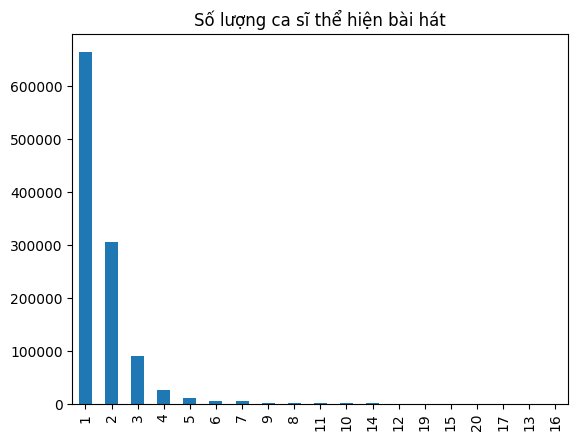

In [24]:
spotify_df['artists_num'] = spotify_df['artists_num'].apply(lambda x: str(x).replace('.0', '')).astype('Int64')
spotify_df['artists_num'].value_counts().plot.bar()
plt.title('Số lượng ca sĩ thể hiện bài hát')

In [25]:
to_numeric('collab', int)
spotify_df['collab'].value_counts()

0    665596
1    443924
Name: collab, dtype: int64

**Số lượng giá trị 0 ở cột collab và giá trị 1 ở cột artists_num phải bằng nhau (số lượng nghệ sĩ biểu diễn là 1 người thì có nghĩa là không collab với ai)**

In [26]:
test = spotify_df[spotify_df['artists_num'] == 1].index == spotify_df[spotify_df['collab'] == 0].index
test.sum()

665596

Vậy ta có thể loại cột `collab` để giảm chiều dữ liệu? (vì từ cột `artists_num` có thể suy ra được cột `collab`)  

In [27]:
spotify_df.drop('collab', axis=1, inplace=True)

Ngoài ra, ta cũng cần chuyển kiểu dữ liệu của `release_date`, `week` về thành datetime

In [28]:
pattern = '%Y-%m-%d'
spotify_df['release_date'] = pd.to_datetime(spotify_df['release_date'], format=pattern)
spotify_df['week'] = pd.to_datetime(spotify_df['week'], format=pattern)

**Chuyển các cột `đặc trưng` (biên độ, âm lượng, tiết tấu..) của âm thanh thành kiểu dữ liệu numeric**

In [29]:
audio_cols = ['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 
              'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']

spotify_df[audio_cols].head()

,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,0.583,0.834,0.0,1.0,-4.875,0.0444,0.0495,0.0,0.0658,0.557,173.935,178203.0
1,0.654,0.354,5.0,1.0,-7.358,0.0738,0.724,0.0,0.134,0.262,81.956,183547.0
2,0.721,0.463,1.0,0.0,-9.483,0.0646,0.241,0.0,0.0929,0.216,137.915,204003.0
3,0.87,0.548,10.0,0.0,-5.253,0.077,0.0924,0.000046,0.0534,0.832,96.018,153750.0
4,0.761,0.696,7.0,0.0,-3.817,0.0505,0.0811,0.000063,0.101,0.501,95.066,133895.0


In [30]:
spotify_df[audio_cols] = spotify_df[audio_cols].astype(float)

**Xem qua một vài thống kê của dữ liệu**

In [31]:
spotify_df.describe()

,rank,artists_num,peak_rank,previous_rank,streams,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
count,1.109520e+06,1109520.0,1.109520e+06,1.109520e+06,1.109520e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06
mean,1.005018e+02,1.611443,4.191652e+01,8.435407e+01,6.821519e+05,6.817758e-01,6.418535e-01,5.325786e+00,5.742693e-01,-6.350350e+00,1.059117e-01,2.697053e-01,1.148840e-02,1.682632e-01,5.346420e-01,1.219060e+02,2.050580e+05
std,5.773315e+01,1.010256,4.659037e+01,5.949596e+01,2.377175e+06,1.381223e-01,1.638659e-01,3.629385e+00,4.944535e-01,2.461208e+00,9.691305e-02,2.528607e-01,7.584283e-02,1.249962e-01,2.263884e-01,2.981120e+01,5.015941e+04
min,1.000000e+00,1.0,1.000000e+00,-1.000000e+00,2.067000e+03,8.590000e-02,3.160000e-03,0.000000e+00,0.000000e+00,-4.141000e+01,2.230000e-02,1.770000e-06,0.000000e+00,1.340000e-02,1.000000e-05,3.126200e+01,3.013300e+04
25%,5.100000e+01,1.0,6.000000e+00,3.100000e+01,2.470400e+04,5.910000e-01,5.350000e-01,2.000000e+00,0.000000e+00,-7.671000e+00,4.100000e-02,5.470000e-02,0.000000e+00,9.270000e-02,3.640000e-01,9.698300e+01,1.726270e+05
50%,1.010000e+02,1.0,2.200000e+01,8.200000e+01,6.335900e+04,7.010000e-01,6.600000e-01,6.000000e+00,1.000000e+00,-6.008000e+00,6.290000e-02,1.860000e-01,0.000000e+00,1.180000e-01,5.370000e-01,1.199840e+02,1.997100e+05
75%,1.502500e+02,2.0,6.500000e+01,1.350000e+02,3.026252e+05,7.870000e-01,7.660000e-01,8.000000e+00,1.000000e+00,-4.598000e+00,1.330000e-01,4.180000e-01,5.220000e-05,2.030000e-01,7.100000e-01,1.410200e+02,2.295650e+05
max,2.000000e+02,20.0,2.000000e+02,2.000000e+02,8.495293e+07,9.860000e-01,1.000000e+00,1.100000e+01,1.000000e+00,1.906000e+00,9.660000e-01,9.950000e-01,9.900000e-01,9.900000e-01,9.920000e-01,2.320180e+02,1.787030e+06


In [32]:
# from fuzzywuzzy import fuzz as wz
# vals = spotify_df['artist_genre'].value_counts().index
# common = [i for i in vals if ' ' not in i]
# spotify_df['artist_genre'].value_counts()[:20]#[common[:20]]
# def transform_genre(x):
#     vals = spotify_df['artist_genre'].value_counts().index
#     common = [i for i in vals if ' ' not in i]
#     for i in common:
#         if wz.partial_ratio(x, i)==100:
#             return i
#     return x
# spotify_df['artist_genre_trans'] = spotify_df['artist_genre'].apply(transform_genre)
# spotify_df['artist_genre_trans'] 
# wz.partial_ratio('hip hop', 'argentine hip hop')s
# common

In [33]:
spotify_df['artist_genre'].value_counts()

pop                     125702
trap latino              42656
latin                    38454
reggaeton                36275
dance pop                34766
                         ...  
progressive doom             1
boom bap                     1
botswana pop                 1
nwobhm                       1
dainuojamoji poezija         1
Name: artist_genre, Length: 1626, dtype: int64

In [34]:
sum(spotify_df['artist_genre'].value_counts().values==1)

79

**Ta thấy có rất nhiều thể loại nhạc (1626 thể loại)**
- Tại sao lại có thể loại nhạc là 0, nghĩa là không có thể loại nhạc (không có thông tin) hay lý do gì khác? Các giá trị này đến từ đâu?

In [35]:
spotify_df[spotify_df['artist_genre']=='0']

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,track_name,release_date,album_num_tracks,album_cover,source,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
18,spotify:track:1fKFxmSByZfjwVSbq0PHye,40,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,Si No Te Tengo / Ángel / Aquello Que Pasó,2021-08-17,1.0,https://i.scdn.co/image/ab67616d0000b27361d8f01f54a346681218e81f,Ke Personajes,29,37,31,803350,2022-04-14,0.419,0.711,11.0,0.0,-4.083,0.0488,0.0513,0.000000,0.2430,0.529,82.180,428439.0,Argentina,South America,Spanish,0
52,spotify:track:6bLvfGI2XeU5DTl8feuNrk,135,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,Cómo estás,2019-04-17,1.0,https://i.scdn.co/image/ab67616d0000b2736dda5e26404d61699789809f,1244305 Records DK,25,139,141,285952,2022-04-14,0.590,0.857,10.0,0.0,-1.986,0.0553,0.2890,0.000004,0.0414,0.976,135.290,227396.0,Argentina,South America,Spanish,0
108,spotify:track:1fKFxmSByZfjwVSbq0PHye,45,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,Si No Te Tengo / Ángel / Aquello Que Pasó,2021-08-17,1.0,https://i.scdn.co/image/ab67616d0000b27361d8f01f54a346681218e81f,Ke Personajes,29,41,33,704832,2022-04-28,0.419,0.711,11.0,0.0,-4.083,0.0488,0.0513,0.000000,0.2430,0.529,82.180,428439.0,Argentina,South America,Spanish,0
154,spotify:track:6bLvfGI2XeU5DTl8feuNrk,161,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,Cómo estás,2019-04-17,1.0,https://i.scdn.co/image/ab67616d0000b2736dda5e26404d61699789809f,1244305 Records DK,25,138,143,254727,2022-04-28,0.590,0.857,10.0,0.0,-1.986,0.0553,0.2890,0.000004,0.0414,0.976,135.290,227396.0,Argentina,South America,Spanish,0
207,spotify:track:6bLvfGI2XeU5DTl8feuNrk,94,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,Cómo estás,2019-04-17,1.0,https://i.scdn.co/image/ab67616d0000b2736dda5e26404d61699789809f,1244305 Records DK,25,92,90,291731,2021-04-08,0.590,0.857,10.0,0.0,-1.986,0.0553,0.2890,0.000004,0.0414,0.976,135.290,227396.0,Argentina,South America,Spanish,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109476,spotify:track:3NPWH2UbMjch2vnS7qMFGM,100,"11:11 Music Group, Martin Arteta",2,11:11 Music Group,spotify:artist:2MDj296KJIfgWDNBtHzeFi,0,https://i.scdn.co/image/ab6761610000e5eb1e4934c0258b5137aadab413,Past Lives,2021-05-27,8.0,https://i.scdn.co/image/ab67616d0000b2735b4d1c2a12718efb519ec78a,11:11 Music Group,73,98,23,61505,2022-05-05,0.730,0.125,3.0,1.0,-17.216,0.0340,0.9160,0.072500,0.0783,0.189,116.058,134583.0,Vietnam,Asia,Vietnamese,0
1109495,spotify:track:5xOkL4eAs735nm6mcnvfS6,139,"Flo D, Giang Nguyễn",2,Flo D,spotify:artist:25cLQ8alZJssXY06KE3SZP,0,https://i.scdn.co/image/ab6761610000e5ebc43411f88f4c61ef613d0c0f,#AiChoAi,2016-04-24,1.0,https://i.scdn.co/image/ab67616d0000b2737f5cf89a00065bcafa3076a0,Flo D,62,174,25,49274,2022-05-05,0.730,0.316,6.0,1.0,-10.632,0.0428,0.9170,0.000343,0.1110,0.713,117.952,159974.0,Vietnam,Asia,Vietnamese,0
1109501,spotify:track:3wrzXRNJVxwOByPpYjyujB,151,"Studio Party, Quang Trung, Vũ Thảo My",3,Studio Party,spotify:artist:4JTjvap7y8AE0AMCH2f6kt,0,https://i.scdn.co/image/ab67616d0000b273bf30aa67f1e46b58809c7b90,Và Ngày Nào Đó (feat. Vũ Thảo My),2022-03-16,4.0,https://i.scdn.co/image/ab67616d0000b273bf30aa67f1e46b58809c7b90,Yin Yang Media,109,140,7,46618,2022-05-05,0.472,0.292,11.0,0.0,-10.275,0.0415,0.7750,0.000000,0.3250,0.140,133.591,269733.0

In [36]:
spotify_df[spotify_df['artist_genre']=='0']['country'].value_counts()

Saudi Arabia    1496
Thailand        1175
Netherlands      851
Germany          766
Italy            751
                ... 
Nicaragua        117
Honduras         110
Hong Kong        101
Pakistan          94
Venezuela         29
Name: country, Length: 74, dtype: int64

In [37]:
spotify_df[audio_cols].isna().sum()

danceability        145
energy              145
key                 145
mode                145
loudness            145
speechiness         145
acousticness        145
instrumentalness    145
liveness            145
valence             145
tempo               145
duration            145
dtype: int64

In [38]:
import os
os.mkdir('./features')
spotify_df.to_csv('./features/processed.csv',index=False, encoding='utf-8-sig')